In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer 
from sklearn.neural_network import MLPRegressor
import seaborn as sb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
pd.set_option('display.max_columns',None)

df = pd.read_csv("kc_final.csv")

df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

#df.isnull().sum()

#df['waterfront'].value_counts()
#df['id'].value_counts()

#Qdict(df.dtypes)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
X = df.loc[:, df.columns != 'price']
y = df.loc[:, df.columns == 'price']

In [5]:
X = X.drop(['Unnamed: 0', 'id'],axis = 1)

In [6]:
#Modifying the date column to show the year the house was sold

X.loc[:, X.columns == 'date'] = X['date'].str[:4]

X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


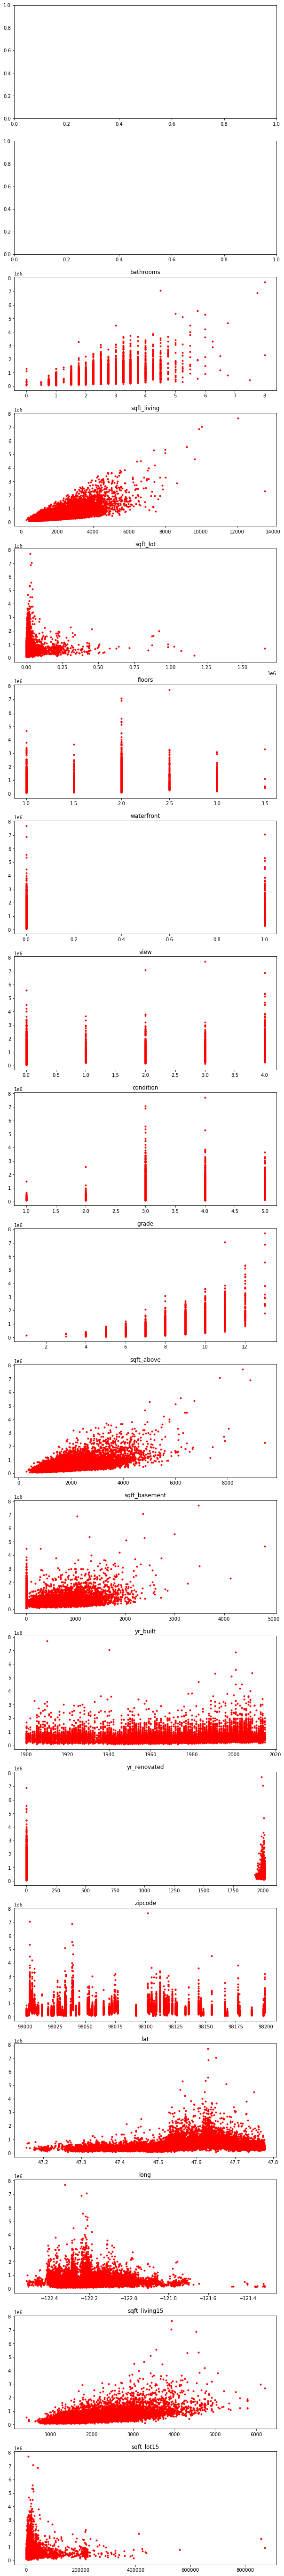

In [7]:
#Simple loop to plot all variables against the price
cols = X.columns

x_axis = [[] for i in range(len(cols))]

for i in range(len(cols)):
    x_axis[i].append(X.loc[:, X.columns == cols[i]])

fig,ax = plt.subplots(nrows = len(cols),figsize = (10,100))
for i in range(2,len(cols)):
    ax[i].plot(x_axis[i][0],y,'r.')
    ax[i].set_title(cols[i])

plt.show()

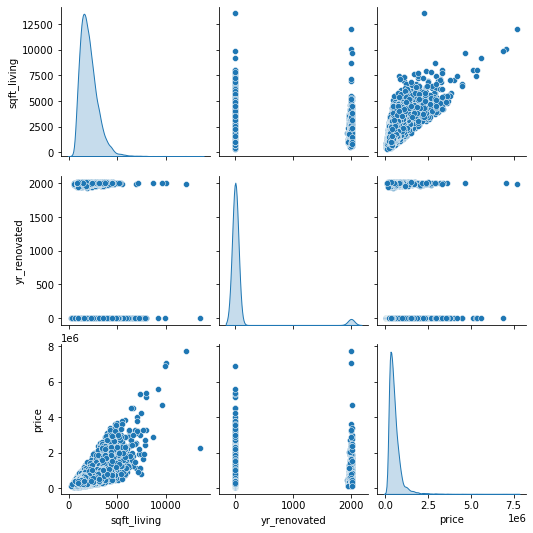

In [8]:
#Simple seaborn pairplot to see correlation between varibales

sb.pairplot(df[['sqft_living','yr_renovated','price']], diag_kind='kde')

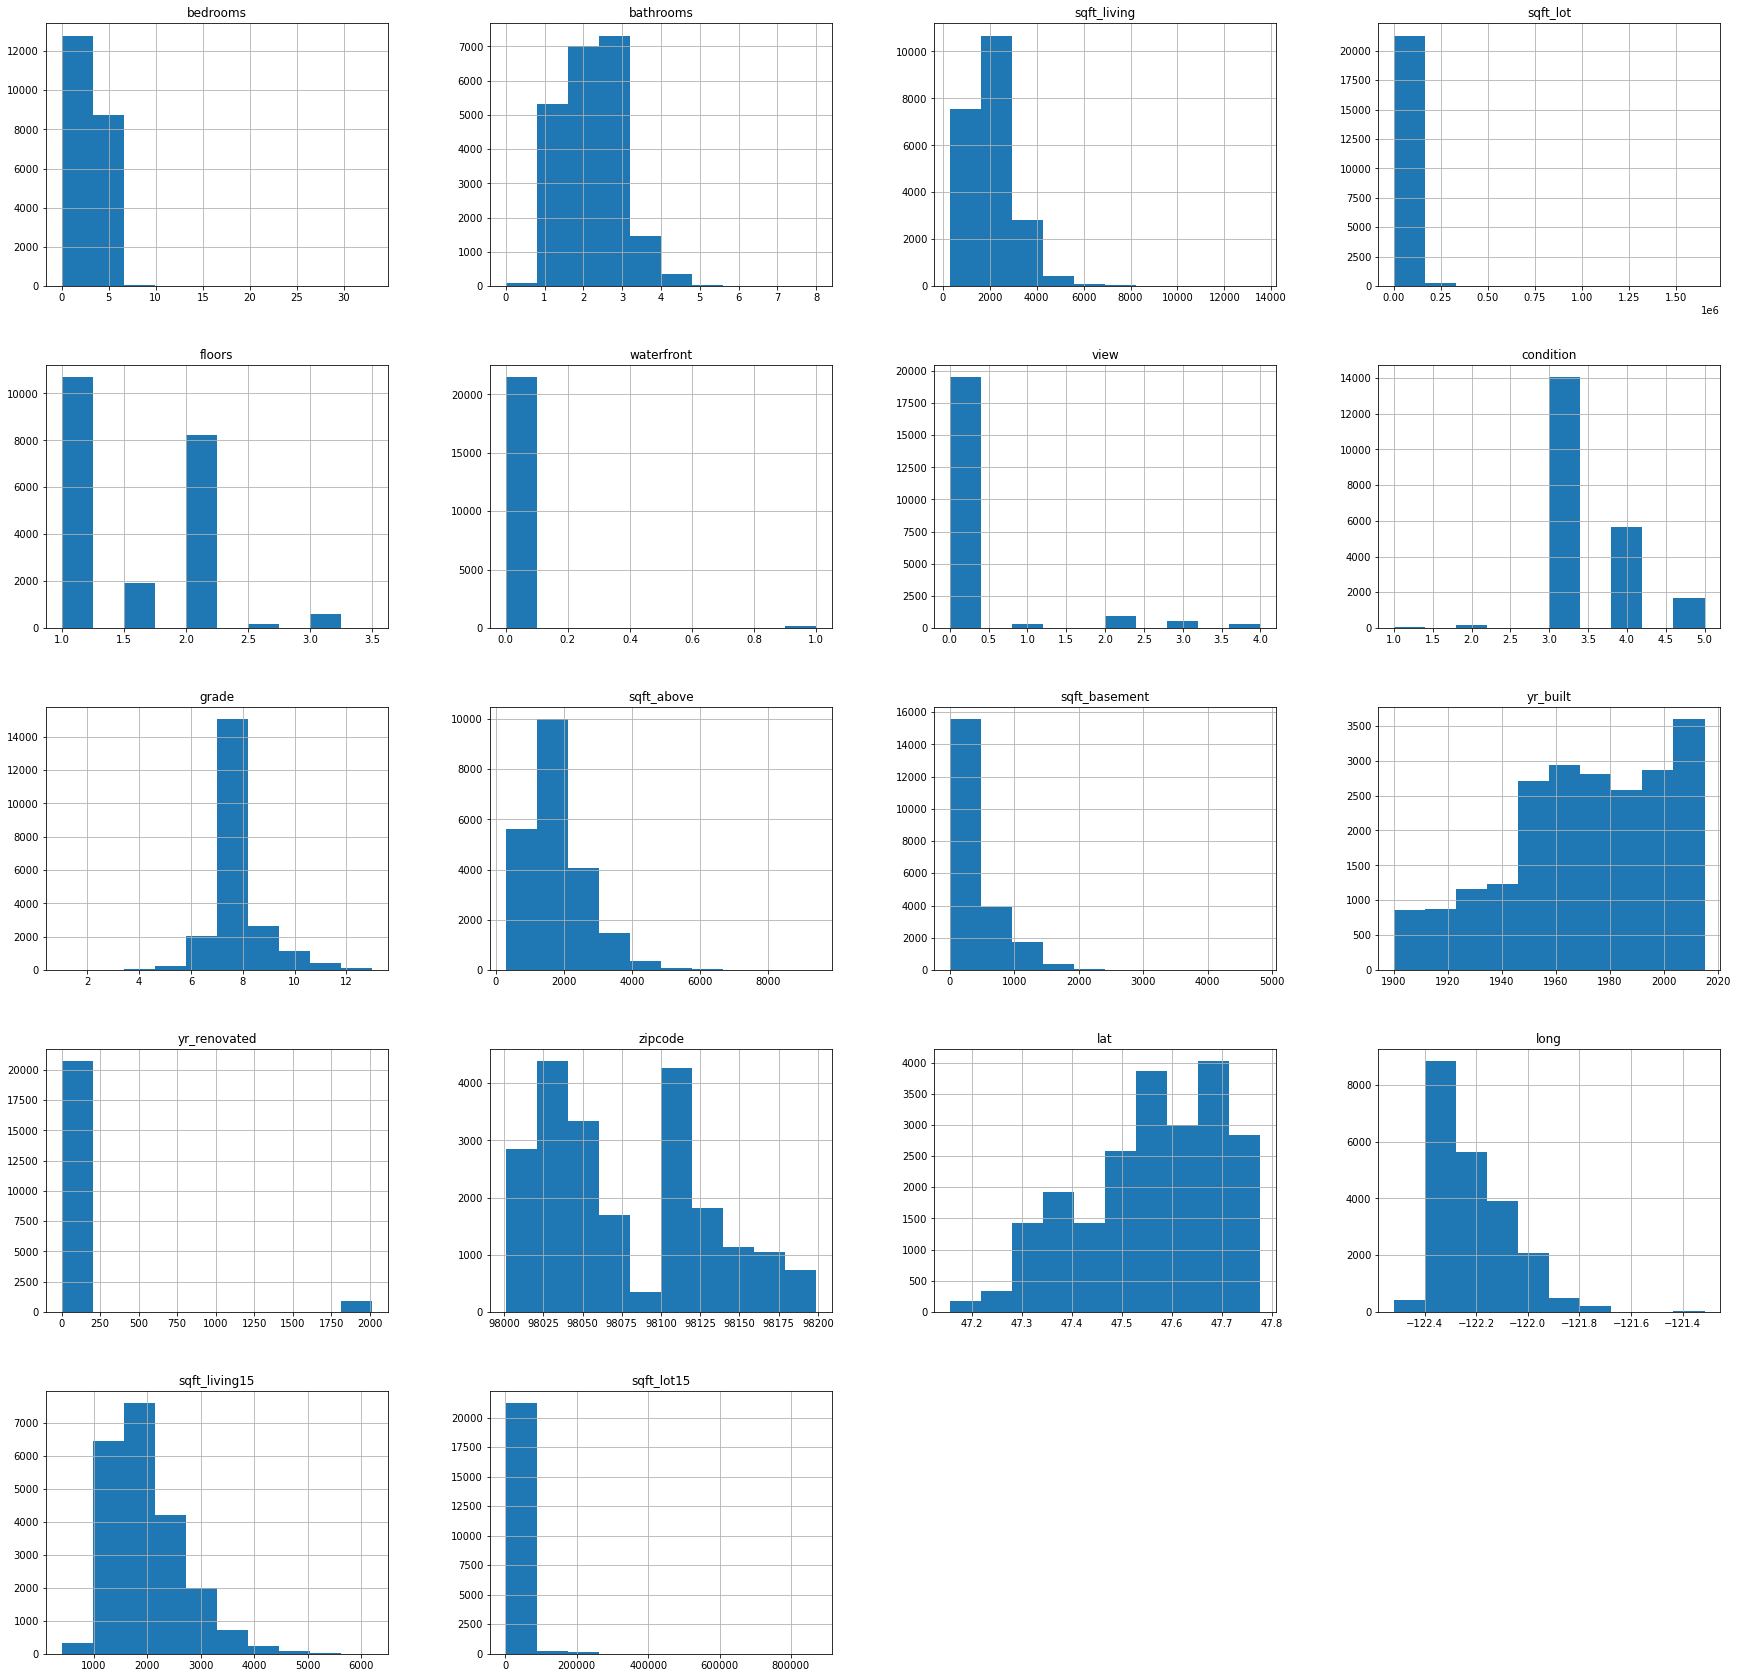

In [9]:
#Pandas histograms for each column

X.hist(figsize = (30,30))
plt.show()

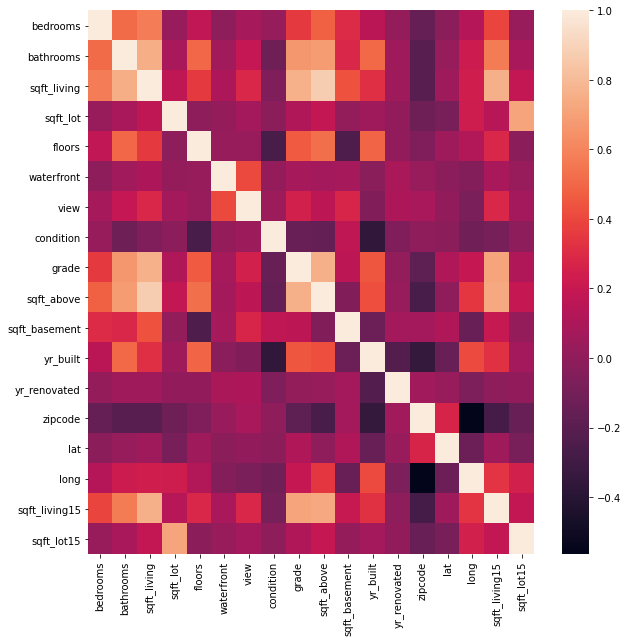

In [10]:
#Correlation heatmap

c = X.corr()

fig = plt.figure(figsize = (10,10))
sb.heatmap(c)

plt.show()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [12]:
#Simple Linear Regression model

scaler = StandardScaler()

X_train_lr = pd.DataFrame(scaler.fit_transform(X_train))
X_test_lr = pd.DataFrame(scaler.fit_transform(X_test))
y_train_lr = scaler.fit_transform(y_train)
y_test_lr = scaler.fit_transform(y_test)

clf_lr = LinearRegression().fit(X_train_lr,y_train_lr)
y_pred_lr = clf_lr.predict(X_test_lr)

r2 = r2_score(y_pred_lr,y_test_lr)
mse = mean_squared_error(y_pred_lr, y_test_lr)
mae = mean_absolute_error(y_pred_lr,y_test_lr)

print ('R2 score = ',r2, '\nMean Square Error =',mse,
       '\nMean Absolute Error = ',mae)

R2 score =  0.5540021838317047 
Mean Square Error = 0.30987892084932894 
Mean Absolute Error =  0.3380806994144979


In [14]:
#Random Forest Regression model

clf = RandomForestRegressor().fit(X_train,y_train.values.ravel())
y_pred_rf = clf.predict(X_test)

y_pred_rf = scaler.fit_transform(np.reshape(y_pred_rf,(len(y_pred_rf),1)))
y_test_rf = scaler.fit_transform(y_test)

r2 = r2_score(y_pred_rf,y_test_rf)
mse = mean_squared_error(y_pred_rf, y_test_rf)
mae = mean_absolute_error(y_pred_rf,y_test_rf)

print ('R2 score = ',r2, '\nMean Square Error =',mse,
       '\nMean Absolute Error = ',mae)

R2 score =  0.8893805285078137 
Mean Square Error = 0.11061947149218632 
Mean Absolute Error =  0.19704161610978657


In [15]:
#MultiLayer Perceptron neural network

X_train_nn = pd.DataFrame(scaler.fit_transform(X_train))
X_test_nn = pd.DataFrame(scaler.fit_transform(X_test))
y_train_nn = scaler.fit_transform(y_train)
y_test_nn = scaler.fit_transform(y_test)

clf_nn = MLPRegressor(hidden_layer_sizes=(256,256,256,256),activation="relu" ,random_state=1, max_iter=2000).fit(X_train_nn,y_train_nn.ravel())
y_nn = clf_nn.predict(X_test_nn)

r2 = r2_score(y_nn,y_test_nn)
mse = mean_squared_error(y_nn, y_test_nn)
mae = mean_absolute_error(y_nn,y_test_nn)

print ( 'R2 score = ',r2, '\nMean Square Error =',mse,
       '\nMean Absolute Error = ',mae)

R2 score =  0.827252378637481 
Mean Square Error = 0.13641631091662884 
Mean Absolute Error =  0.19764669667014806


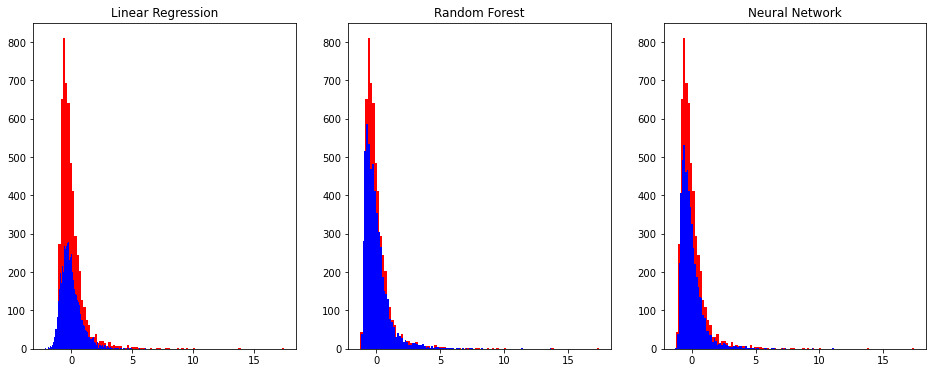

In [16]:
#Histograms of the test values against the predicted values for each method

fig,ax = plt.subplots(ncols = 3,figsize = (16,6))

ax[0].hist(y_test_lr, bins = 100,color = 'red')
ax[0].hist(y_pred_lr,bins = 100,color = 'blue')
ax[0].set_title('Linear Regression')
ax[1].hist(y_test_rf, bins = 100,color = 'red')
ax[1].hist(y_pred_rf, bins = 100,color = 'blue')
ax[1].set_title('Random Forest')
ax[2].hist(y_test_nn,bins = 100, color  = 'red')
ax[2].hist(y_nn,bins = 100, color = 'blue')
ax[2].set_title('Neural Network')

plt.show()


In [17]:
#Keras regression neural network

model = Sequential([
    Dense(100,input_dim = X.shape[1],kernel_initializer = 'normal', activation = 'relu' ),
    Dense(100),
    Dense(100),
    Dense(50),
    Dense(1),
])

In [18]:
#Early Stopping callback

#path = 'model_checkpoints/chechpoint'
#checkpoint = ModelCheckpoint(path, save_weights_only=True,verbose=1,save_best_only=True,
                           #  monitor='mean_absolute_error',
                           #  save_freq='epoch')

early = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=1, patience=20)

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [20]:
#Training of the model

X = np.asarray(X).astype(np.float32)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

X_train_dn = pd.DataFrame(scaler.fit_transform(X_train))
X_test_dn = pd.DataFrame(scaler.fit_transform(X_test))
y_train_dn = scaler.fit_transform(y_train)
y_test_dn = scaler.fit_transform(y_test)

history = model.fit(X_train_dn, y_train_dn, epochs = 200, batch_size = 64, validation_split = 0.15,callbacks = [early])

Epoch 1/200
216/216 [==============================] - 1s 3ms/step - loss: 0.2875 - mean_absolute_error: 0.3253 - val_loss: 0.1761 - val_mean_absolute_error: 0.2716
Epoch 2/200
216/216 [==============================] - 1s 2ms/step - loss: 0.2133 - mean_absolute_error: 0.2856 - val_loss: 0.1914 - val_mean_absolute_error: 0.2838
Epoch 3/200
216/216 [==============================] - 1s 2ms/step - loss: 0.1945 - mean_absolute_error: 0.2713 - val_loss: 0.1499 - val_mean_absolute_error: 0.2502
Epoch 4/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1807 - mean_absolute_error: 0.2622 - val_loss: 0.1471 - val_mean_absolute_error: 0.2536
Epoch 5/200
216/216 [==============================] - 1s 3ms/step - loss: 0.1788 - mean_absolute_error: 0.2605 - val_loss: 0.1432 - val_mean_absolute_error: 0.2400
Epoch 6/200
216/216 [==============================] - 0s 2ms/step - loss: 0.1620 - mean_absolute_error: 0.2473 - val_loss: 0.1853 - val_mean_absolute_error: 0.2677
Epoch 7/20

216/216 [==============================] - 0s 2ms/step - loss: 0.0888 - mean_absolute_error: 0.1912 - val_loss: 0.1243 - val_mean_absolute_error: 0.2083
Epoch 51/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0879 - mean_absolute_error: 0.1908 - val_loss: 0.1173 - val_mean_absolute_error: 0.1985
Epoch 52/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0865 - mean_absolute_error: 0.1881 - val_loss: 0.1172 - val_mean_absolute_error: 0.2030
Epoch 53/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0887 - mean_absolute_error: 0.1888 - val_loss: 0.1421 - val_mean_absolute_error: 0.2105
Epoch 54/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0908 - mean_absolute_error: 0.1913 - val_loss: 0.1129 - val_mean_absolute_error: 0.2106
Epoch 55/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0874 - mean_absolute_error: 0.1904 - val_loss: 0.1430 - val_mean_absolute_error: 0.2137
Epoch 56/200
216/

216/216 [==============================] - 0s 2ms/step - loss: 0.0793 - mean_absolute_error: 0.1828 - val_loss: 0.1612 - val_mean_absolute_error: 0.2185
Epoch 100/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0781 - mean_absolute_error: 0.1826 - val_loss: 0.1233 - val_mean_absolute_error: 0.2023
Epoch 101/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0763 - mean_absolute_error: 0.1790 - val_loss: 0.1315 - val_mean_absolute_error: 0.2056
Epoch 102/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0728 - mean_absolute_error: 0.1764 - val_loss: 0.1196 - val_mean_absolute_error: 0.2090
Epoch 103/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0729 - mean_absolute_error: 0.1762 - val_loss: 0.1206 - val_mean_absolute_error: 0.2013
Epoch 104/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0788 - mean_absolute_error: 0.1828 - val_loss: 0.1180 - val_mean_absolute_error: 0.2133
Epoch 105/20

216/216 [==============================] - 0s 2ms/step - loss: 0.0680 - mean_absolute_error: 0.1735 - val_loss: 0.1332 - val_mean_absolute_error: 0.2072
Epoch 149/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0704 - mean_absolute_error: 0.1745 - val_loss: 0.1211 - val_mean_absolute_error: 0.2090
Epoch 150/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0677 - mean_absolute_error: 0.1738 - val_loss: 0.1405 - val_mean_absolute_error: 0.2098
Epoch 151/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0691 - mean_absolute_error: 0.1739 - val_loss: 0.1116 - val_mean_absolute_error: 0.2000
Epoch 152/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0682 - mean_absolute_error: 0.1744 - val_loss: 0.1179 - val_mean_absolute_error: 0.2036
Epoch 153/200
216/216 [==============================] - 0s 2ms/step - loss: 0.0694 - mean_absolute_error: 0.1736 - val_loss: 0.1137 - val_mean_absolute_error: 0.2019
Epoch 154/20

In [21]:
loss,mae = model.evaluate(X_test_dn, y_test_dn)

print (loss,mae)

169/169 [==============================] - 0s 2ms/step - loss: 0.1240 - mean_absolute_error: 0.2068
0.12396661192178726 0.2068074345588684


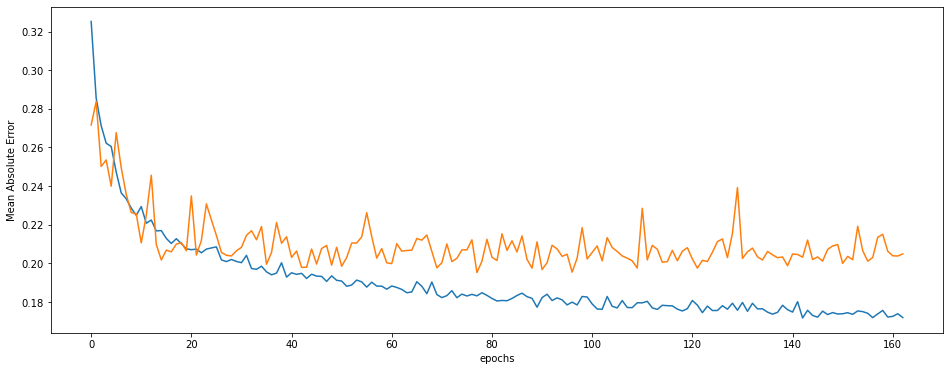

In [22]:
fig,ax = plt.subplots(figsize = (16,6))
ax.plot(history.history['mean_absolute_error'])
ax.plot(history.history['val_mean_absolute_error'])
ax.set_xlabel('epochs')
ax.set_ylabel('Mean Absolute Error')
plt.show()